In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path
sys.path.append('../scenes/')
import syndiff as sd

In [2]:
def Get_Catalogue(tpf, Catalog = 'gaia'):
    """
    Get the coordinates and mag of all sources in the field of view from a specified catalogue.


    I/347/gaia2dis   Distances to 1.33 billion stars in Gaia DR2 (Bailer-Jones+, 2018)

    -------
    Inputs-
    -------
        tpf 				class 	target pixel file lightkurve class
        Catalogue 			str 	Permitted options: 'gaia', 'dist', 'ps1'

    --------
    Outputs-
    --------
        coords 	array	coordinates of sources
        Gmag 	array 	Gmags of sources
    """
    c1 = SkyCoord(tpf.ra, tpf.dec, frame='icrs', unit='deg')
    # Use pixel scale for query size
    pix_scale = 4.0  # arcseconds / pixel for Kepler, default
    if tpf.mission == 'TESS':
        pix_scale = 21.0
    # We are querying with a diameter as the radius, overfilling by 2x.

    Vizier.ROW_LIMIT = -1
    if Catalog == 'gaia':
        catalog = "I/345/gaia2"
    elif Catalog == 'dist':
        catalog = "I/347/gaia2dis"
    elif Catalog == 'ps1':
        catalog = "II/349/ps1"
    else:
        raise ValueError("{} not recognised as a catalog. Available options: 'gaia', 'dist','ps1'")

    result = Vizier.query_region(c1, catalog=[catalog],
                                 radius=Angle(np.max(tpf.shape[1:]) * pix_scale, "arcsec"),%colors)
    no_targets_found_message = ValueError('Either no sources were found in the query region '
                                          'or Vizier is unavailable')
    #too_few_found_message = ValueError('No sources found brighter than {:0.1f}'.format(magnitude_limit))
    if result is None:
        raise no_targets_found_message
    elif len(result) == 0:
        raise no_targets_found_message
    result = result[catalog].to_pandas()

    return result 

In [3]:
c = SkyCoord(0*u.deg,40*u.deg)

In [23]:
cols = ['TIC','RAJ2000','DEJ2000','Tmag','e_Tmag']

vquery = Vizier(columns=cols,row_limit=-1)

In [29]:
result =vquery.query_region(c, catalog=["IV/38/tic"],
                                 radius=Angle(1, "arcminute"))

In [16]:
result = Vizier.query_region(c, catalog=["IV/38/tic"],
                                 radius=Angle(10, "arcminute"))

In [30]:
result

TableList with 1 tables:
	'0:IV/38/tic' with 5 column(s) and 6 row(s) 

In [31]:
result = result['IV/38/tic'].to_pandas()

In [32]:
result.keys()

Index(['TIC', 'RAJ2000', 'DEJ2000', 'Tmag', 'e_Tmag'], dtype='object')

In [33]:
result

,TIC,RAJ2000,DEJ2000,Tmag,e_Tmag
0,432485262,0.008866,39.986553,14.414000,0.007
1,455788713,359.985732,39.995404,16.854000,0.012
2,432486444,359.998569,39.991202,18.063999,0.007
3,432482861,0.004140,39.995002,17.990000,0.007
4,432483164,0.003564,40.004865,18.038000,0.007
5,432483344,0.015552,40.011460,16.940001,0.018


In [35]:
def Get_TIC(tpf):
    c = SkyCoord(tpf.ra, tpf.dec, frame='icrs', unit='deg')
    pix_scale = 4.0  # arcseconds / pixel for Kepler, default
    if tpf.mission == 'TESS':
        pix_scale = 21.0
    cols = ['TIC','RAJ2000','DEJ2000','Tmag','e_Tmag']
    vquery = Vizier(columns=cols,row_limit=-1)
    result =vquery.query_region(c, catalog=["IV/38/tic"],
                                 radius=Angle(np.max(tpf.shape[1:]) * pix_scale, "arcsec"))
    result = result['IV/38/tic'].to_pandas()
    return result

In [34]:
def TIC_query(coord,rad):
    cols = ['TIC','RAJ2000','DEJ2000','Tmag','e_Tmag']
    vquery = Vizier(columns=cols,row_limit=-1)
    result =vquery.query_region(c, catalog=["IV/38/tic"],
                                 radius=Angle(rad, "arcminute"))
    result = result['IV/38/tic'].to_pandas()
    return result

In [ ]:
def Match_cats(table,add):
    

In [2]:
ra = 299.6193292     
dec = 62.1377889
# host fqv
#ra = 189.1428830     
#dec = 11.2386300
size = 15
tpf = sd.Get_TESS(ra,dec,size)


/Users/rridden/miniconda3/lib/python3.7/site-packages/lightkurve/search.py:233: LightkurveWarning: Warning: 7 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)


In [3]:
cat = sd.Unified_catalog(tpf,Gaia_dist=False)

In [4]:
cat

,objID,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,gmag,e_gmag,gKmag,e_gKmag,rmag,...,tmag,gaiaid,gaiamag,gaiadist,gaiadist_u,gaiadist_l,Tmag_tic,eTmag_tic,row,col
0,182482997440408342,299.743995,62.073009,0.0034,0.0026,19.3525,0.0082,19.4602,0.0165,18.1346,...,17.5745,2238068528362252288,18.0745,NaN,NaN,NaN,17.110001,0.009,21.130817,0.045444
1,182512997660638636,299.766039,62.098231,0.0034,0.0024,19.7403,0.0113,19.8477,0.0268,18.7899,...,18.3435,2238068940679143552,18.8435,NaN,NaN,NaN,18.077999,0.007,17.050972,-2.888267
2,182502997633726415,299.763327,62.088046,0.0392,0.0669,22.2232,0.1860,22.3834,0.3184,21.6834,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,18.800194,-2.214832
3,182522997826346455,299.782582,62.104730,0.0093,0.0146,21.5867,0.0585,21.7087,0.1405,20.7269,...,20.3131,2238068940682244224,20.8131,NaN,NaN,NaN,20.202000,0.049,16.177454,-4.539912
4,182512997769706256,299.777056,62.096259,0.0181,0.0123,21.2526,0.0420,21.3975,0.1113,20.7673,...,20.3480,2238068940679387136,20.8480,NaN,NaN,NaN,20.457001,0.023,17.578924,-3.710381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,NaN,299.462339,62.145165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.2401,2238118285561455872,20.7401,NaN,NaN,NaN,20.513000,0.069,3.751416,20.046731
1025,NaN,299.493411,62.139710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.9733,2238119690017508480,20.4733,NaN,NaN,NaN,19.702000,0.090,5.231722,17.734481
1026,NaN,299.477929,62.161725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.8438,2238119797388565120,19.3438,NaN,NaN,NaN,18.905001,0.028,1.098674,18.019902
1027,NaN,299.537365,62.201760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.2698,2238120312784476032,19.7698,NaN,NaN,NaN,19.340000,0.600,-4.954875,11.338647


In [19]:
gr = cat.gmag.values - cat.rmag.values
r = cat.rmag.values
dt = cat.tmag.values - cat.Tmag_tic.values

m = ~sd.sigma_clip(gr,sigma=2).mask

<IPython.core.display.Javascript object>


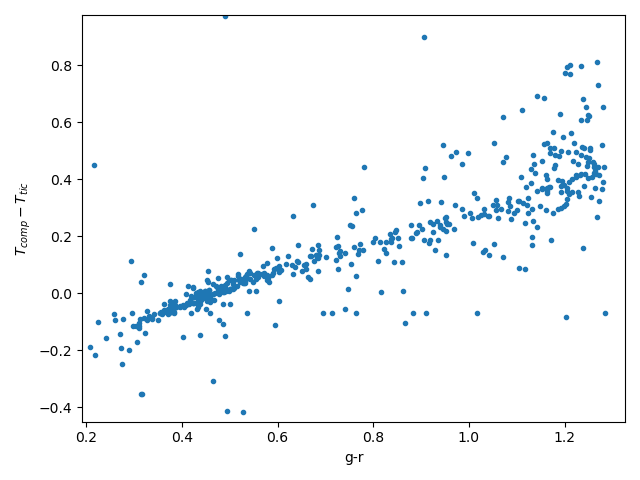

In [22]:
plt.figure()
#plt.subplot(211)
plt.plot(gr[m],dt[m],'.')
plt.xlabel('g-r')
plt.ylabel('$T_{comp} - T_{tic}$')
#plt.subplot(212)
#plt.plot(r[m],dt[m],'.')
plt.tight_layout()

<IPython.core.display.Javascript object>


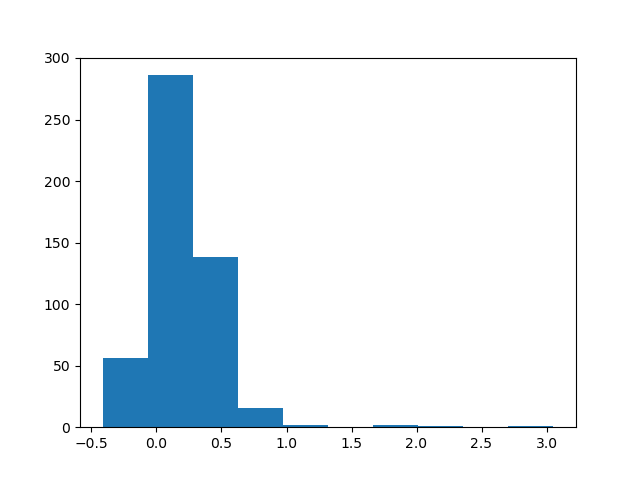

(array([ 56., 286., 138.,  16.,   2.,   0.,   2.,   1.,   0.,   1.]),
 array([-0.41479944, -0.0680295 ,  0.27874043,  0.62551037,  0.9722803 ,
         1.31905024,  1.66582017,  2.01259011,  2.35936004,  2.70612997,
         3.05289991]),
 <BarContainer object of 10 artists>)

In [21]:
plt.figure()
plt.hist(dt[m])